In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

In [199]:
# Задаване на координатната система
def create_field(figsize = (7,7), x_lim = (-20, 20), y_lim= (-20, 20)):
    plt.figure(figsize =figsize)  

    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)   
    
    ax.spines['right'].set_visible(False)
    ax.set_aspect('equal')
    plt.axis('equal')
    
    plt.xlim(*x_lim)
    plt.ylim(*y_lim)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Преместване на лейбълите на осите отстрани 
    ax.xaxis.set_label_coords(1.05, 0.5)
    ax.yaxis.set_label_coords(0.5, 1.05) 
    
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

In [200]:
def create_line(a,b, x_lim):
    x = np.linspace(*x_lim,500)
    y = a*x + b
    return x, y

In [201]:
def create_spiral(r_incr_velocity = 1, angle_velocity=1, init_angle=0, lin_space = (0, 100)):
    T = np.linspace(*lin_space, 2000)
    
    x = [r_incr_velocity * time * np.cos(init_angle + time * angle_velocity) for time in T]
    y = [r_incr_velocity * time * np.sin(init_angle + time * angle_velocity) for time in T]
    
    return x, y

In [202]:
def get_spiral_vec_coords(spiral_vec_magnitude,spiral_vec_velocity, angle_velocity, init_angle=0):
    # Т e времето за което спиралният вектор е достигнал съответната големина.
    # Чрез него ще намерим съответстващият ъгъл на завъртане на спиралата за тази големина на вектора
    T = spiral_vec_magnitude / spiral_vec_velocity
    spiral_angle = init_angle + T * angle_velocity
    
    x = spiral_vec_magnitude * np.cos(spiral_angle)
    y = spiral_vec_magnitude * np.sin(spiral_angle)
    
    # Връща началните координати на вектора - 0,0 - и крайните координати - x,y
    return 0, 0, x, y
    

In [393]:
def get_line_vector_magnitude(x, a, b):
    y = a*x + b
    vec_magnitude = distance((0, 0), (x, y))
    
    return vec_magnitude

In [407]:
def get_angle(slope, degrees = False):
    if slope == 'inf':
        if degrees:
            return 90
        return np.pi/2
    if degrees:
        return np.arctan(slope) * 180/np.pi
    return np.arctan(slope)

In [408]:
# Calculates the minimum distance between the linear function and the center of the spiral.
def get_little_radius_vec(slope, constant):
    if slope == 'inf' or slope == 0:
        return constant

    # The value of the x at y = 0
    x = -constant/slope
    angle = get_angle(slope)
    return abs(x * np.cos(np.pi/2 - abs(angle)))

In [777]:
def get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim):
    y_intersection_points = []

    if init_spiral_angle >= 2*np.pi:
        while init_spiral_angle >= 2*np.pi:
            init_spiral_angle-=2*np.pi

    
    start_angle = 0

    if np.pi/2 <=  init_spiral_angle < 3*np.pi/2:

        angle_diff = 3*np.pi /2 - init_spiral_angle
        start_angle = 3*np.pi /2
    elif init_spiral_angle >= 3*np.pi/2:

        angle_diff = np.pi /2 + (2 * np.pi  - init_spiral_angle)
        start_angle = np.pi /2
    elif 0<=init_spiral_angle<np.pi/2:

        angle_diff = np.pi/2 - init_spiral_angle
        start_angle = np.pi /2
        
    t = angle_diff / spiral_angle_velocity
    spiral_radius_magnitude = t * spiral_radius_velocity
    y_intersection_points.append([0, spiral_radius_magnitude * np.sin(start_angle)])

    if spiral_radius_magnitude< np.mean([abs(y_lim[0]), abs(y_lim[1])]):

        while spiral_radius_magnitude< np.mean([abs(y_lim[0]), abs(y_lim[1])]):
       
            start_angle += np.pi
            t = np.pi / spiral_angle_velocity
            spiral_radius_magnitude += t * spiral_radius_velocity
            y_intersection_points.append([0, spiral_radius_magnitude * np.sin(start_angle)])

      
    return y_intersection_points

In [778]:
def rotate_y_intersection_points(y_intersects,angle, init_spiral_angle, spiral_radius_velocity, spiral_angle_velocity):
        
        updated_y_intersection_points = []
        
        angle_diff = angle - np.pi/2
        t = angle_diff / spiral_angle_velocity
      
        for point in y_intersects:
         
            spiral_radius_magnitude = abs(point[1]) + t * spiral_radius_velocity
            new_t = spiral_radius_magnitude / spiral_radius_velocity
            
            x = spiral_radius_magnitude * np.cos(init_spiral_angle + new_t * spiral_angle_velocity)
            y = spiral_radius_magnitude * np.sin(init_spiral_angle + new_t * spiral_angle_velocity)

            updated_y_intersection_points.append([x, y])
            
        return updated_y_intersection_points
    

In [824]:
def plot_objects(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle):
    x = 4.67
    y = a * x + b
    
    line_vec_magnitude = get_line_vector_magnitude(x, a, b)
    
    spiral_vec_magnitude = line_vec_magnitude

    create_field(figsize, x_lim, y_lim)
    
    x_line, y_line = create_line(a, b, (-20, 20))
    
    x_help_line, y_help_line = create_line(a, 0, (-20, 20))
    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity,
                                       lin_space= (0, 50))
 
    spiral_vec_coords = get_spiral_vec_coords(spiral_vec_magnitude, 
                                              spiral_radius_velocity,
                                              spiral_angle_velocity,
                                              init_spiral_angle)
    
    distance_between_vectors = distance((x, y), (spiral_vec_coords[2], spiral_vec_coords[3]))
    print('Distance between vectors: ', distance_between_vectors)
    
    
    # Изобразяване на линейната функция
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Помощна линия
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
    # Вектор на спиралата
    plt.quiver(*spiral_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'red')
    
    # Вектор на линията
    plt.quiver(0, 0, x, y, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'blue')
    
    # Точка от линията
    plt.scatter(x, y, color= 'b', s = 10)
    
    # Точка от спиралата
    plt.scatter(spiral_vec_coords[2], spiral_vec_coords[3], color= 'red', s = 10)
    
    # Разстояние между точките на линията и спиралата
    plt.plot((x, spiral_vec_coords[2]), (y, spiral_vec_coords[3]), color = 'gray', linewidth = 2, linestyle = '-')
    
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    y_intersects = get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim)
    
    line_angle = get_angle(a, degrees= False) + np.pi
  
    for points in y_intersects:
        plt.scatter(points[0], points[1], color= 'black', s = 20)
        
    updated_y_intersection_points = rotate_y_intersection_points(y_intersects,line_angle, init_spiral_angle,
                                                                 spiral_radius_velocity, spiral_angle_velocity)
         
    for points in updated_y_intersection_points:
        plt.scatter(points[0], points[1], color= 'green', s = 20)
                                                                 
    plt.show()

In [681]:
def plot_vectors_distances(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, x_range):    
    base_triangle_distances = []
    spiral_vector_coordinates = []
    line_vector_coordinates = []

  
    x_line = np.linspace(*x_range, 2000)
    y_line = a*x_line + b

    line_radius_vector_magnitudes = ([get_line_vector_magnitude(x, a, b) for x in x_line])
    
    for i in range(len(x_line)):
        line_vector_coordinates.append([x_line[i], y_line[i]])
        
    for vec_magnitude in line_radius_vector_magnitudes:
        spiral_vector_coordinates.append(get_spiral_vec_coords(vec_magnitude, 
                                                  spiral_radius_velocity,
                                                  spiral_angle_velocity,
                                                  init_spiral_angle))
        
    for i in range(len(line_vector_coordinates)):
        base_triangle_distances.append(distance((line_vector_coordinates[i][0],line_vector_coordinates[i][1]),
                                               (spiral_vector_coordinates[i][2],spiral_vector_coordinates[i][3])))
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(x_line,base_triangle_distances)
    plt.xlabel('X')
    plt.ylabel('Distance magnitude between vectors')
    plt.show()

In [825]:
# Define line and spiral variables
a = 0.97
b = 10

spiral_radius_velocity = 0.5
init_spiral_angle = np.pi/2
spiral_angle_velocity = 1

x_range = (-10, 10)
x_lim, y_lim = (-20, 20),(-20, 20)
figsize = (7,7)

Distance between vectors:  8.743920521323155


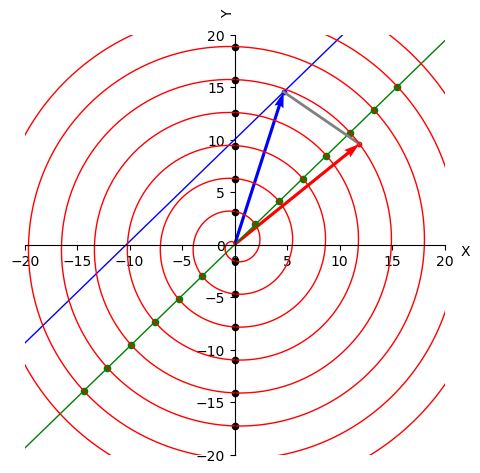

In [826]:
plot_objects(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)
# plot_vectors_distances(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, x_range)

Init H:  0.6 Init angle:  0.6435011087932844
Spiral vec H:  0.821219385875064 Spiral angle:  0.9635447211363088
Ratio H`s:  0.7306208430048932 Ratio angles:  0.6678476822896223


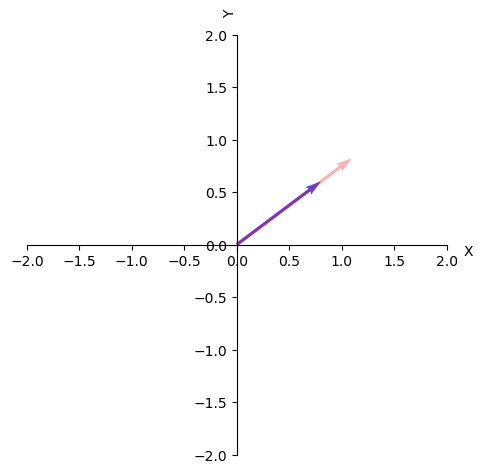

In [843]:

create_field(figsize, (-2,2), (-2,2))
unit_vector_length = 1

vec_velocity = 0.01
angle_velocity = np.pi/2/90

h = 0.6
init_angle = np.arcsin(h)

t = init_angle / angle_velocity

new_vector_length = unit_vector_length + t * vec_velocity

init_vec_coords = [unit_vector_length * np.cos(init_angle), unit_vector_length * np.sin(init_angle)]

new_vec_coords = [new_vector_length * np.cos(t*angle_velocity), new_vector_length * np.sin(t*angle_velocity)]

plt.quiver(0, 0, *init_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'blue', alpha = 0.7)
plt.quiver(0, 0, *new_vec_coords, angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01, color = 'red', alpha = 0.3)


print('Init H: ', h, 'Init angle: ',init_angle)

print('Spiral vec H: ', new_vec_coords[1], 'Spiral angle: ', np.arcsin(new_vec_coords[1]))

print('Ratio H`s: ',h / new_vec_coords[1],'Ratio angles: ',init_angle / np.arcsin(new_vec_coords[1]) )

plt.show()

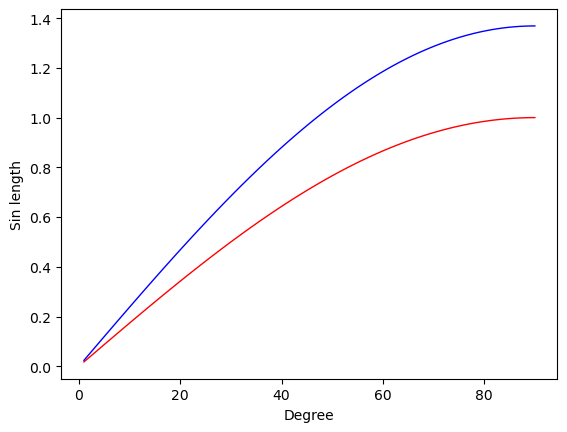

Sin Constant:  1.36869897645844


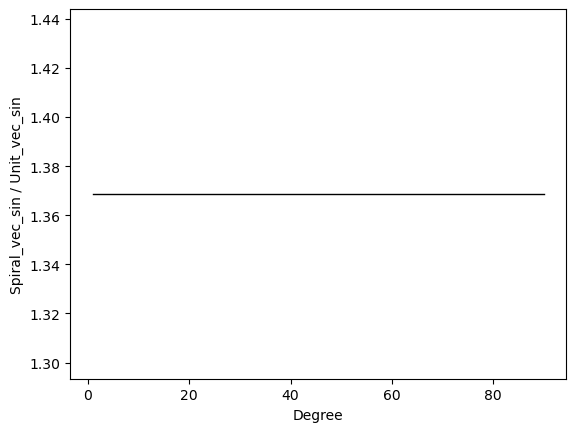

In [857]:
def get_sinuses_and_cosinuses(vec_velocity, angle_velocity, init_angle, curr_angle):
    t = init_angle / angle_velocity
    spiral_vec_length = t * vec_velocity
    
    unit_vec_sin = np.sin(init_angle + curr_angle)
    spiral_vec_sin = new_vector_length * np.sin(init_angle + curr_angle)
    
    return unit_vec_sin, spiral_vec_sin

unit_angle_diff = np.pi/2/90
sinuses = []
sinuses_ratios = []
cosinuses_ratios = []
for degree in range(1, 91):
    curr_angle = degree * unit_angle_diff
    unit_vec_sin, spiral_vec_sin = get_sinuses_and_cosinuses(vec_velocity, angle_velocity, 0, curr_angle)
    sinuses.append([unit_vec_sin, spiral_vec_sin])
    
    sinuses_ratios.append(spiral_vec_sin/unit_vec_sin)
sinuses = np.array(sinuses)

plt.plot(range(1,len(sinuses)+1), sinuses[:,0],color = 'red', linewidth = 1, linestyle = '-')
plt.plot(range(1,len(sinuses)+1), sinuses[:,1],color = 'blue', linewidth = 1, linestyle = '-')
plt.xlabel('Degree')
plt.ylabel('Sin length')
plt.show()
print('Sin Constant: ', sinuses_ratios[0])
plt.plot(range(1,len(sinuses_ratios)+1), sinuses_ratios,color = 'black', linewidth = 1, linestyle = '-')
plt.xlabel('Degree')
plt.ylabel('Spiral_vec_sin / Unit_vec_sin')
plt.show()